## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing the dataset

In [3]:
df = pd.read_excel('Final_Train.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
# df['Qualification'] = df['Qualification'].apply(lambda x: x.split(', '))

In [6]:
# a = []
# for i in range(0,df.shape[0]):
#     for j in range(0,len(df['Qualification'][i])):
#         b = df['Qualification'][i][j]
#         if b not in a:
#             a.append(b)
# len(a)

In [7]:
df.drop(columns=['Qualification'], inplace=True)
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


## Checking for Null values & Filling them

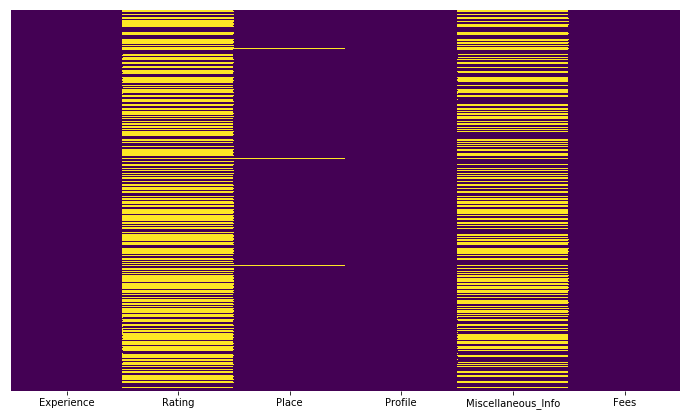

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.isnull().sum()

Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [10]:
df['Rating'].fillna('0%', inplace=True)
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [11]:
# from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, fill_value='Not_Known', strategy='constant')
df.iloc[:,2:3] = imp1.fit_transform(df.iloc[:,2:3])
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


## Converting attributes

In [12]:
for i in range(0,df.shape[0]):
    df.loc[i,'Experience'] = int(df['Experience'][i].rstrip(' years experience'))
    df.loc[i,'Rating'] = int(df['Rating'][i].rstrip('%'))/100
    df.loc[i,'City'] = re.sub(r'[\w|\W]*, ', '', df['Place'][i])
    df.loc[i,'Place'] = re.sub(r', [\w|\W]*', '', df['Place'][i])
    if str(df['Miscellaneous_Info'][i]).find('Feedback') == -1:
        df.loc[i,'Miscellaneous_Info'] = 0
    else:
        df.loc[i,'Miscellaneous_Info'] = int(re.sub(r'Feedback.*', '', df['Miscellaneous_Info'][i]).rstrip()[-2:].lstrip())
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,24,1,Kakkanad,Homeopath,16,100,Ernakulam
1,12,0.98,Whitefield,Ayurveda,76,350,Bangalore
2,9,0,Mathikere - BEL,ENT Specialist,0,300,Bangalore
3,12,0,Bannerghatta Road,Ayurveda,0,250,Bangalore
4,20,1,Keelkattalai,Ayurveda,4,250,Chennai


In [13]:
df[df['Place'] == 'e'].index

Int64Index([3980], dtype='int64')

In [14]:
df.iloc[3979:3983,:]

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
3979,28,0,Kakkanad,Dentist,1,100,Ernakulam
3980,23,0,e,Dentist,0,250,e
3981,14,0,Malad West,General Medicine,0,800,Mumbai
3982,16,0,Kothamangalam,General Medicine,0,70,Ernakulam


In [15]:
df.drop(index=3980, inplace=True)
df.iloc[3979:3983,:]

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
3979,28,0,Kakkanad,Dentist,1,100,Ernakulam
3981,14,0,Malad West,General Medicine,0,800,Mumbai
3982,16,0,Kothamangalam,General Medicine,0,70,Ernakulam
3983,6,1,Borivali West,Homeopath,0,100,Mumbai


## Visualizing the relationship between the features & the response using scatterplots

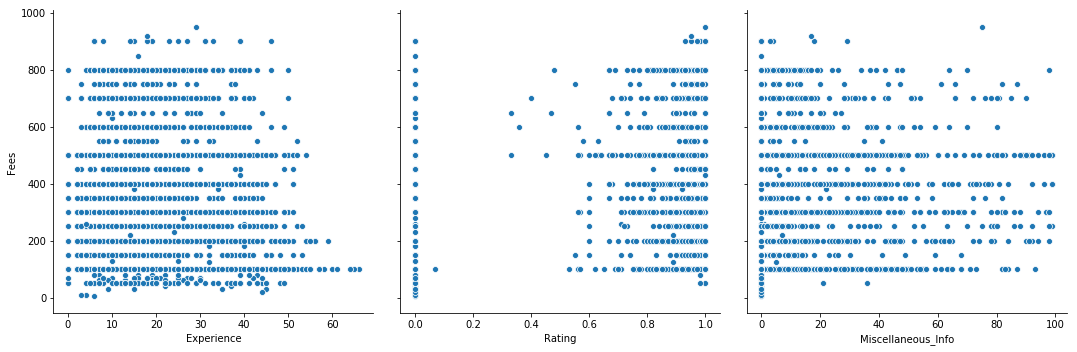

In [16]:
sns.pairplot(df, x_vars=['Experience','Rating','Miscellaneous_Info'], y_vars='Fees', height=5, aspect=1)

In [17]:
df.dtypes

Experience             int64
Rating                object
Place                 object
Profile               object
Miscellaneous_Info     int64
Fees                   int64
City                  object
dtype: object

In [18]:
df = df.astype({"Rating": int})

In [19]:
df.dtypes

Experience             int64
Rating                 int32
Place                 object
Profile               object
Miscellaneous_Info     int64
Fees                   int64
City                  object
dtype: object

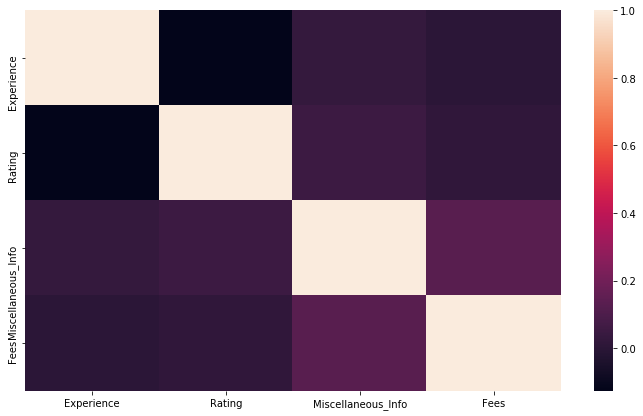

In [20]:
sns.heatmap(df.corr())

In [21]:
df.describe()

,Experience,Rating,Miscellaneous_Info,Fees
count,5960.000000,5960.000000,5960.000000,5960.000000
mean,17.303020,0.114765,5.861745,307.954362
std,11.143489,0.318765,15.339991,190.934916
min,0.000000,0.000000,0.000000,5.000000
25%,9.000000,0.000000,0.000000,150.000000
50%,14.000000,0.000000,0.000000,300.000000
75%,23.000000,0.000000,1.000000,500.000000
max,66.000000,1.000000,99.000000,950.000000


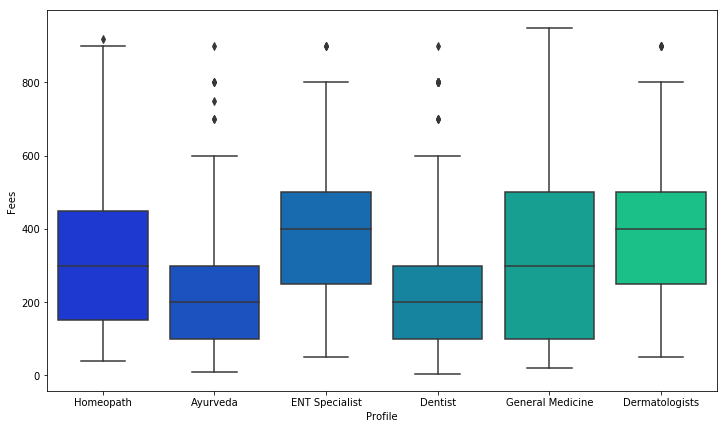

In [22]:
sns.boxplot(x='Profile', y='Fees', data=df, palette='winter')

## Creating dummy variables & then excluding the first dummy column

In [23]:
# place_dummies = pd.get_dummies(df.Place, prefix='Place')
# place_dummies = place_dummies.iloc[:, 1:]

city_dummies = pd.get_dummies(df.City, prefix='City')
city_dummies = city_dummies.iloc[:, 1:]

profile_dummies = pd.get_dummies(df.Profile, prefix='Profile')
profile_dummies = profile_dummies.iloc[:, 1:]

In [24]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# le_X = LabelEncoder()
# X[:,0] = le_X.fit_transform(X[:,0])

# ohe = OneHotEncoder(categorical_features = [0])
# X = ohe.fit_transform(X).toarray()

# le_y = LabelEncoder()
# y = le_y.fit_transform(y)

## Concatenating the dummy variable columns onto the DataFrame 

In [25]:
# (axis=0 means rows, axis=1 means columns)
# df = pd.concat([place_dummies, city_dummies, profile_dummies, df], axis=1)
# df = pd.concat([place_dummies, profile_dummies, df], axis=1)
df = pd.concat([city_dummies, profile_dummies, df], axis=1)
df.drop(columns=['Place','Profile','City'], inplace=True)
df.head()

,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Not_Known,City_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Experience,Rating,Miscellaneous_Info,Fees
0,0,0,0,1,0,0,0,0,0,0,0,0,1,24,1,16,100
1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,76,350
2,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,300
3,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,250
4,1,0,0,0,0,0,0,0,0,0,0,0,0,20,1,4,250


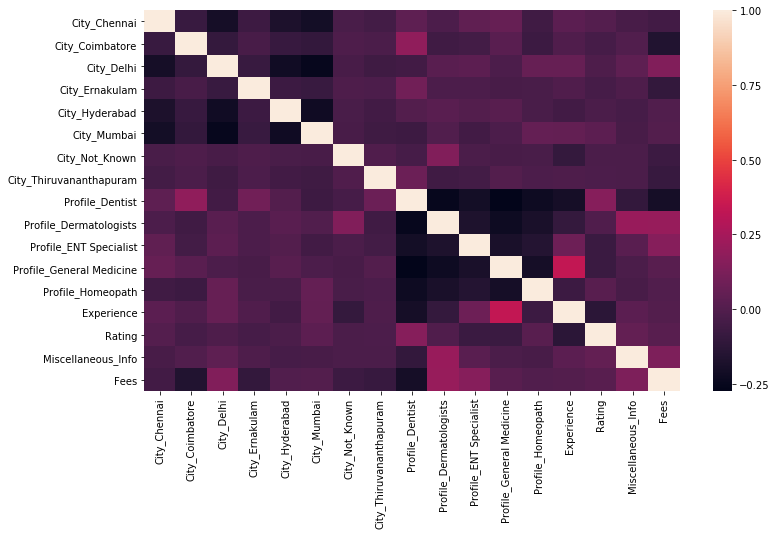

In [26]:
sns.heatmap(df.corr())

## Splitting dataframe into dependent & independent variables

In [27]:
# X = df.iloc[:,:-1].values
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

## Standardizing the features

In [28]:
# from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# from sklearn.preprocessing import MinMaxScaler
# sc_X = MinMaxScaler()
# X = sc_X.fit_transform(X)

e:\rohit\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\rohit\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Splitting into training & test sets

In [29]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005)

Data Preprocessing Done!

## Multivariate Linear Regression

In [30]:
# from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression(n_jobs=-1)
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [31]:
y_pred1 = regressor1.predict(X_test)
y_pred1

array([265.03253851, 312.41111142, 241.66547594, 248.64478468,
       432.12138125, 160.37070306, 418.23185246, 345.37382969,
       258.39655521, 417.52290865, 419.99410239, 272.08153823,
       316.67735763, 329.02417105, 433.88363118, 342.24104554,
       292.41887502, 235.4873061 , 392.32390517, 262.89993183,
       414.87953375, 361.10670876, 414.87953375, 263.27028857,
       339.59767064, 365.51233359, 406.06828409, 229.76333779,
       114.947574  , 310.64886148])

In [32]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [33]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred1))   # best possible score is 1.0, lower values are worse.
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred1))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred1))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred1))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred1))
print('R2_Score: ',metrics.r2_score(y_test, y_pred1))   #  Best possible score is 1.0

Explained_Variance_Score:  0.2932012907723125
Mean_Absolute_Error:  144.1690344559844
Mean_Squared_Error:  29320.29170442202
Root_Mean_Squared_Error:  171.23169012896537
Mean_Squared_Log_Error:  0.7257756506791656
Median_Absolute_Error:  135.34482349381247
R2_Score:  0.2901367152745704


In [34]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.15750872539570038 0.021284747566937334


In [35]:
import statsmodels.formula.api as sm
X_opt = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     76.88
Date:                Sat, 03 Aug 2019   Prob (F-statistic):          2.10e-215
Time:                        00:31:08   Log-Likelihood:                -39230.
No. Observations:                5960   AIC:                         7.849e+04
Df Residuals:                    5944   BIC:                         7.860e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.9544      2.266    135.888      0.000     303.512     312.397
x1           -16.9219      2.741     -6.173      0.000     -22.296     -11.548
x2           -28.0388      2.480    -11.304      0.000     -32.901     -23.176
x3            12.3510      2.844      4.344      0.000       6.777      17.925
x4           -19.1004      2.390     -7.992      0.000     -23.786     -14.415
x5            -8.7333      2.763     -3.161      0.002     -14.149      -3.318
x6            -5.0785      2.851     -1.781      0.075     -10.667       0.510
x7           -20.6857      2.316     -8.932      0.000     -25.226     -16.146
x8           -13.9115      2.341     -5.943      0.000     -18.501      -9.322
x9             7.9922      3.426      2.333      0.020       1.277      14.708
x10           61.0284      3.172     19.241      0.000      54.811      67.246
x11           50.3459      2.985     16.865      0.000      44.494      56.198
x12           37.0598      3.333     11.120      0.000      30.526      43.593
x13           21.8495      3.035      7.199      0.000      15.900      27.800
x14           -9.6675      2.482     -3.895      0.000     -14.533      -4.802
x15            5.0038      2.325      2.152      0.031       0.446       9.561
==============================================================================
Omnibus:                      281.130   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.291
Skew:                           0.565   Prob(JB):                     1.71e-70
Kurtosis:                       3.126   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LASSO

In [36]:
# from sklearn.linear_model import LassoCV
regressor2 = LassoCV(cv=5, n_jobs=-1, eps=0.00001, n_alphas=100)
regressor2.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=1e-05, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [37]:
y_pred2 = regressor2.predict(X_test)
y_pred2

array([265.0291373 , 312.41054184, 241.67130287, 248.64458093,
       432.12030181, 160.3722031 , 418.2309577 , 345.372364  ,
       258.39564014, 417.51906246, 419.99310778, 272.07773759,
       316.67392406, 329.02098161, 433.88245188, 342.23710716,
       292.41892618, 235.48768919, 392.32375573, 262.90603938,
       414.87583735, 361.10728981, 414.87583735, 263.26698722,
       339.59388205, 365.51266499, 406.06508698, 229.76316552,
       114.9498788 , 310.64839177])

In [38]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [39]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred2))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred2))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred2))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred2))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred2))
print('R2_Score: ',metrics.r2_score(y_test, y_pred2))

Explained_Variance_Score:  0.29319785776922025
Mean_Absolute_Error:  144.1691217779789
Mean_Squared_Error:  29320.456226885148
Root_Mean_Squared_Error:  171.23217053721285
Mean_Squared_Log_Error:  0.725777711447202
Median_Absolute_Error:  135.3461422421741
R2_Score:  0.29013273207899837


In [40]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor2, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.157482411758008 0.021285978987936303


In [41]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'eps': [0.001, 0.0001, 0.00001], 'n_alphas': [10, 100, 1000]}]
grid_search = GridSearchCV(estimator = regressor2,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.15717023270769925 {'eps': 0.0001, 'n_alphas': 10}


## Ridge / Shrinkage Regression

In [42]:
# from sklearn.linear_model import Ridge
regressor3 = Ridge(alpha=10)
regressor3.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
y_pred3 = regressor3.predict(X_test)
y_pred3

array([264.80810447, 312.34430855, 242.44148624, 248.61496601,
       431.90679575, 160.36607071, 418.04833716, 345.2724035 ,
       258.2603501 , 417.07614369, 419.80171685, 271.82162322,
       316.41471394, 328.73577851, 433.66017543, 341.88612617,
       292.33316269, 235.46641415, 392.11610679, 263.81989266,
       414.44607416, 361.00875727, 414.44607416, 263.05472478,
       339.25605664, 365.39220649, 405.67917572, 229.7812743 ,
       115.25119033, 310.59092886])

In [44]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [45]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred3))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred3))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred3))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred3))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred3))
print('R2_Score: ',metrics.r2_score(y_test, y_pred3))

Explained_Variance_Score:  0.29274116960546326
Mean_Absolute_Error:  144.18937503526956
Mean_Squared_Error:  29341.841442359662
Root_Mean_Squared_Error:  171.29460424181394
Mean_Squared_Log_Error:  0.7258362694201845
Median_Absolute_Error:  135.58863237427065
R2_Score:  0.28961498213795633


In [46]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor3, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.1575142358961609 0.02125693226667829


In [47]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'alpha':[0.1, 1, 1.5, 10]}]
grid_search = GridSearchCV(estimator = regressor3,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.1571728977996354 {'alpha': 10}


## Elastic-Net Regression

In [48]:
# from sklearn.linear_model import ElasticNet
regressor4 = ElasticNet(alpha=0.1, l1_ratio=1)
regressor4.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
y_pred4 = regressor4.predict(X_test)
y_pred4

array([264.15155674, 312.26363616, 243.17478943, 248.59184235,
       431.84177624, 160.7589109 , 418.0001046 , 344.99433752,
       258.15933349, 416.52679065, 419.73649751, 271.09712838,
       315.78820865, 328.19818593, 433.57816915, 341.22113275,
       292.4320563 , 235.58622566, 392.28511171, 264.48199828,
       413.92220129, 361.25713451, 413.92220129, 262.41516383,
       338.61654339, 365.59811678, 405.24023674, 229.71861551,
       115.54438862, 310.52724325])

In [50]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [51]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred4))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred4))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred4))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred4))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred4))
print('R2_Score: ',metrics.r2_score(y_test, y_pred4))

Explained_Variance_Score:  0.29230138427982344
Mean_Absolute_Error:  144.19166668567675
Mean_Squared_Error:  29363.41601209077
Root_Mean_Squared_Error:  171.35756771176105
Mean_Squared_Log_Error:  0.7263140963099135
Median_Absolute_Error:  135.68648768221084
R2_Score:  0.289092647807512


In [52]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor4, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.15749508547385313 0.02129282713245541


In [53]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'alpha':[0.01, 0.1, 1, 1.5], 'l1_ratio':[0.1, 0.5, 1]}]
grid_search = GridSearchCV(estimator = regressor4,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.15717045483278277 {'alpha': 0.01, 'l1_ratio': 1}


## Support Vector Regressor (SVR)

In [54]:
# from sklearn.svm import SVR
regressor5 = SVR(C=10, kernel = 'rbf', gamma=0.1)
regressor5.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
y_pred5 = regressor5.predict(X_test)
y_pred5

array([219.38159944, 295.79686975, 181.62625972, 199.91770506,
       452.442103  , 150.09950866, 450.58868594, 291.12041926,
       199.95386366, 426.99253046, 455.9538277 , 197.50675965,
       288.7026928 , 319.1834092 , 460.10256586, 359.44453794,
       271.63373473, 199.74029895, 390.89125895, 304.55716674,
       429.06229742, 301.43729149, 429.06229742, 224.82937127,
       356.39724518, 301.38163175, 416.54433087, 197.23778598,
       109.96874682, 293.49450584])

In [56]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [57]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred5))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred5))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred5))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred5))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred5))
print('R2_Score: ',metrics.r2_score(y_test, y_pred5))

Explained_Variance_Score:  0.3733786671076331
Mean_Absolute_Error:  130.202673241375
Mean_Squared_Error:  26557.965644857923
Root_Mean_Squared_Error:  162.96614876979183
Mean_Squared_Log_Error:  0.664929850591646
Median_Absolute_Error:  105.9354775349201
R2_Score:  0.3570144213319453


In [58]:
regressor5.score(X_test, y_test)

0.3570144213319453

In [59]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor5, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.14559941091018525 0.036164392279832584


In [60]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# efs = EFS(regressor4, scoring='r2', cv=10)
# efs.fit(X, y)

# print('Best MSE score: %.2f' % efs.best_score_ * (-1))
# print('Best subset (indices):', efs.best_idx_)
# print('Best subset (corresponding names):', efs.best_feature_names_)

In [61]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_search = GridSearchCV(estimator = regressor5,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.14867747857978425 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## Decision Tree Regression

In [62]:
# from sklearn.tree import DecisionTreeRegressor
regressor6 = DecisionTreeRegressor()
regressor6.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
y_pred6 = regressor6.predict(X_test)
y_pred6

array([322.22222222, 366.66666667, 199.23076923, 221.42857143,
       200.        , 116.66666667, 375.        , 350.        ,
       230.76923077, 533.33333333, 225.        , 285.71428571,
       285.71428571, 450.        , 480.        , 420.        ,
       337.5       , 500.        , 407.69230769, 300.        ,
       338.88888889, 400.        , 338.88888889, 321.42857143,
       478.57142857, 378.57142857, 457.14285714, 207.14285714,
       116.66666667, 500.        ])

In [64]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [65]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred6))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred6))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred6))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred6))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred6))
print('R2_Score: ',metrics.r2_score(y_test, y_pred6))

Explained_Variance_Score:  0.020248526574949466
Mean_Absolute_Error:  155.236975986976
Mean_Squared_Error:  40507.58176813351
Root_Mean_Squared_Error:  201.2649541478434
Mean_Squared_Log_Error:  0.7670399087007612
Median_Absolute_Error:  129.67032967032966
R2_Score:  0.019285164687688372


In [66]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor6, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

-0.11534485810853604 0.0886133715562507


In [67]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# export_graphviz(classifier5, out_file=dot_data, filled=True, rounded=True, special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Random Forest Regression

In [68]:
# from sklearn.ensemble import RandomForestRegressor
regressor7 = RandomForestRegressor(n_estimators = 500, n_jobs=-1)
regressor7.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
y_pred7 = regressor7.predict(X_test)
y_pred7

array([300.35586907, 291.3720202 , 191.94510528, 223.5180767 ,
       302.68063492,  90.9189899 , 334.70105755, 290.89684826,
       220.16663569, 525.7654329 , 341.32445166, 275.80168467,
       289.07884503, 380.12198413, 487.85438395, 404.41159208,
       372.276057  , 477.79333333, 413.33994821, 300.90174603,
       367.12507922, 383.10307887, 367.12507922, 343.43757576,
       499.63674076, 361.25839513, 476.12300228, 220.84304113,
       128.04761905, 291.03428571])

In [70]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [71]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred7))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred7))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred7))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred7)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred7))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred7))
print('R2_Score: ',metrics.r2_score(y_test, y_pred7))

Explained_Variance_Score:  0.4256226319098252
Mean_Absolute_Error:  122.58502857598984
Mean_Squared_Error:  23724.167216608428
Root_Mean_Squared_Error:  154.02651465448548
Mean_Squared_Log_Error:  0.5464493177871877
Median_Absolute_Error:  115.71251541267347
R2_Score:  0.42562251980538435


In [72]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor7, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.003697663731046462 0.06605668994153209


In [73]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [300, 500, 1000]}]
grid_search = GridSearchCV(estimator = regressor7,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

-0.011728522332561962 {'n_estimators': 300}


## K-Nearest Neighbors (KNN) Regression

In [74]:
# from sklearn.neighbors import KNeighborsRegressor
regressor8 = KNeighborsRegressor(n_neighbors=20, n_jobs=-1)
regressor8.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='uniform')

In [75]:
y_pred8 = regressor8.predict(X_test)
y_pred8

array([280. , 315. , 248. , 217.5, 410. , 125. , 352.5, 285. , 230. ,
       480. , 340. , 240. , 332.5, 372.5, 380. , 441.5, 325. , 340. ,
       375. , 327.5, 397.5, 342.5, 397.5, 320. , 393.5, 352.5, 432.5,
       177.5, 128.5, 385. ])

In [76]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [77]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred8))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred8))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred8))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred8)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred8))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred8))
print('R2_Score: ',metrics.r2_score(y_test, y_pred8))

Explained_Variance_Score:  0.3136761516366734
Mean_Absolute_Error:  142.0
Mean_Squared_Error:  28397.483333333334
Root_Mean_Squared_Error:  168.51552846350194
Mean_Squared_Log_Error:  0.6593405039322009
Median_Absolute_Error:  135.75
R2_Score:  0.3124785046427281


In [78]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor8, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.14338219837547533 0.04008275217382161


In [79]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[5, 10, 20]}]
grid_search = GridSearchCV(estimator = regressor8,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.14304199237353257 {'n_neighbors': 20}


## XGBoost (eXtreme Gradient Boosting)

In [80]:
# from xgboost import XGBRegressor
regressor9 = XGBRegressor(n_jobs=-1, objective='reg:squarederror', gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0)
regressor9.fit(X_train,y_train)
# n_estimators: It controls the number of weak learners.
# learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=0)

In [81]:
y_pred9 = regressor9.predict(X_test)
y_pred9

array([253.69313, 352.59528, 243.99364, 220.63304, 414.99875, 127.7622 ,
       439.99356, 310.26553, 233.0806 , 414.4775 , 448.44214, 232.78996,
       291.51538, 339.9538 , 412.1644 , 361.30792, 321.1477 , 293.44748,
       394.4396 , 299.61255, 412.62387, 366.19446, 412.62387, 254.80879,
       357.7404 , 351.62772, 420.33472, 183.15039, 142.14699, 352.59528],
      dtype=float32)

In [82]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [83]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred9))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred9))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred9))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred9)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred9))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred9))
print('R2_Score: ',metrics.r2_score(y_test, y_pred9))

Explained_Variance_Score:  0.32560236157334477
Mean_Absolute_Error:  140.55151646931967
Mean_Squared_Error:  27952.002890615586
Root_Mean_Squared_Error:  167.1885249968298
Mean_Squared_Log_Error:  0.6712702819840535
Median_Absolute_Error:  127.9213981628418
R2_Score:  0.3232638751818918


In [84]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor9, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.17845172560776676 0.031834858512474154


In [85]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'max_depth':[3, 5], 'learning_rate':[0.1, 0.5], 'n_estimators':[200, 300], 'verbosity':[0, 1, 2, 3], 'gamma':[0, 0.1]}]
# grid_search = GridSearchCV(estimator = regressor9,
#                            param_grid = parameters,
#                            scoring = 'r2',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# print(grid_search.best_score_, grid_search.best_params_)

## AdaBoost (Adaptive Boosting)

In [86]:
# from sklearn.ensemble import AdaBoostRegressor
regressor10 = AdaBoostRegressor(base_estimator=regressor5, learning_rate=0.1)
regressor10.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         learning_rate=0.1, loss='linear', n_estimators=50,
         random_state=None)

In [87]:
y_pred10 = regressor10.predict(X_test)
y_pred10

array([244.52158591, 341.75829364, 243.23351025, 200.27616198,
       414.32540202, 153.76931802, 446.31401222, 302.02470459,
       249.88077229, 412.29046849, 452.4474031 , 210.18425039,
       297.84403753, 353.74240537, 419.25655237, 395.49034546,
       339.8606168 , 291.76513228, 390.62420658, 341.19886466,
       416.37573438, 318.10920435, 416.37573438, 255.14950593,
       395.22440861, 322.02544452, 415.91653741, 194.91772994,
       146.43602427, 343.52021731])

In [88]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [89]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred10))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred10))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred10))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred10)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred10))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred10))
print('R2_Score: ',metrics.r2_score(y_test, y_pred10))

Explained_Variance_Score:  0.3484209682562893
Mean_Absolute_Error:  138.38957576362978
Mean_Squared_Error:  26971.760902965758
Root_Mean_Squared_Error:  164.23081593588262
Mean_Squared_Log_Error:  0.6995517313051933
Median_Absolute_Error:  143.87754808313917
R2_Score:  0.34699616966905555


In [90]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor10, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.1787946942528168 0.025083015096898618


In [91]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'base_estimator':[regressor5, regressor6], 'learning_rate':[0.1, 0.5, 1, 1.5], 'loss':['linear', 'square', 'exponential'], 'n_estimators':[50, 100, 200]}]
# grid_search = GridSearchCV(estimator = regressor10,
#                            param_grid = parameters,
#                            scoring = 'r2',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# print(grid_search.best_score_, grid_search.best_params_)

## Gradient Boosting Regression

In [92]:
# from sklearn.ensemble import GradientBoostingRegressor
regressor11 = GradientBoostingRegressor()
regressor11.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
y_pred11 = regressor11.predict(X_test)
y_pred11

array([245.50002889, 348.02651364, 262.78224345, 223.13090883,
       416.753383  , 141.15050062, 438.24673768, 316.34181111,
       230.9166964 , 403.20016814, 441.12128153, 226.46352935,
       288.5959129 , 330.03590302, 416.753383  , 346.41122689,
       318.7523898 , 258.88293086, 399.86754763, 311.49898969,
       403.20016814, 371.12133114, 403.20016814, 250.90335449,
       346.41122689, 362.74628375, 411.57521554, 196.62479928,
       151.30445827, 348.02651364])

In [94]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [95]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred11))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred11))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred11))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred11)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred11))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred11))
print('R2_Score: ',metrics.r2_score(y_test, y_pred11))

Explained_Variance_Score:  0.2981781175314163
Mean_Absolute_Error:  143.2199976451135
Mean_Squared_Error:  29120.747107092782
Root_Mean_Squared_Error:  170.64802110511795
Mean_Squared_Log_Error:  0.6986908968431489
Median_Absolute_Error:  130.47629971173302
R2_Score:  0.294967819437425


In [96]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor11, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.1769623477434863 0.03070513193954071


## LightGBM (Light Gradient Boosting)

In [97]:
# import lightgbm as lgb
regressor12 = LGBMRegressor()
regressor12.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [98]:
y_pred12 = regressor12.predict(X_test)
y_pred12

array([264.40534271, 355.58247935, 228.11721284, 231.98126133,
       350.58690681, 130.05822342, 368.48774717, 311.17456867,
       237.0425897 , 432.66499191, 393.91455556, 232.4885693 ,
       285.12550258, 376.3443092 , 420.93520198, 410.25710521,
       360.40637976, 315.2692016 , 391.14295172, 299.99671715,
       399.05563238, 368.15364178, 399.05563238, 263.67307724,
       380.07041976, 342.95784089, 444.08857597, 175.44828581,
       135.02046728, 340.22595092])

In [99]:
y_test

array([100, 100, 100, 250, 600,   5, 150, 100, 100, 500, 800, 200, 300,
       200, 500, 300, 500, 500, 500, 300, 500, 300, 500, 500, 650, 250,
       600, 300, 150, 100], dtype=int64)

In [100]:
# from sklearn import metrics
print('Explained_Variance_Score: ',metrics.explained_variance_score(y_test, y_pred12))
print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test, y_pred12))
print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test, y_pred12))
print('Root_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred12)))
print('Mean_Squared_Log_Error: ',metrics.mean_squared_log_error(y_test, y_pred12))
print('Median_Absolute_Error: ',metrics.median_absolute_error(y_test, y_pred12))
print('R2_Score: ',metrics.r2_score(y_test, y_pred12))

Explained_Variance_Score:  0.3215895661804521
Mean_Absolute_Error:  141.06199399867526
Mean_Squared_Error:  28128.812312408536
Root_Mean_Squared_Error:  167.71646404694005
Mean_Squared_Log_Error:  0.668685969962307
Median_Absolute_Error:  126.58771812871109
R2_Score:  0.3189832043690083


In [101]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor12, X = X, y = y, cv = 10, n_jobs=-1)
print(accuracies.mean(),accuracies.std())

0.16055035059822606 0.03808390665867591


In [102]:
# from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[100, 200]}]
grid_search = GridSearchCV(estimator = regressor12,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.153851214423595 {'n_estimators': 100}
